In [52]:
# TASK 6
# CINEMA TICKETS
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

In [53]:
# import pandas as pd
cinemaData=pd.read_csv("D:\\intership\\New folder\\TASK  6-CINEMA TICKETS\\cinemaTicket_Ref.csv")
cinemaData

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4


In [54]:
cinemaData.columns

Index(['film_code', 'cinema_code', 'total_sales', 'tickets_sold',
       'tickets_out', 'show_time', 'occu_perc', 'ticket_price', 'ticket_use',
       'capacity', 'date', 'month', 'quarter', 'day'],
      dtype='object')

In [55]:
cinemaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


In [56]:
cinemaData.describe()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
count,142524.000000,142524.000000,1.425240e+05,142524.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142524.000000
mean,1518.985111,320.378427,1.234728e+07,140.137570,0.237413,3.932103,19.965986,81234.599886,139.900157,854.723605,6.776852,2.634721,16.112585
std,36.184450,159.701229,3.065486e+07,279.758733,2.923206,3.056276,22.653445,33236.599278,279.564935,953.118103,2.195843,0.809692,8.949471
min,1471.000000,32.000000,2.000000e+04,1.000000,0.000000,1.000000,0.000000,483.870968,-219.000000,-2.000000,2.000000,1.000000,1.000000
25%,1485.000000,181.000000,1.260000e+06,18.000000,0.000000,2.000000,3.750000,60000.000000,18.000000,276.994486,5.000000,2.000000,8.000000
50%,1498.000000,324.000000,3.720000e+06,50.000000,0.000000,3.000000,10.350000,79454.235185,50.000000,525.714286,7.000000,3.000000,16.000000
75%,1556.000000,474.000000,1.110000e+07,143.000000,0.000000,5.000000,28.210000,100000.000000,143.000000,1038.961039,9.000000,3.000000,24.000000
max,1589.000000,637.000000,1.262820e+09,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.097160,11.000000,4.000000,31.000000


In [57]:
cinemaData.isna()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142519,False,False,False,False,False,False,False,False,False,False,False,False,False,False
142520,False,False,False,False,False,False,False,False,False,False,False,False,False,False
142521,False,False,False,False,False,False,False,False,False,False,False,False,False,False
142522,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [58]:
cinemaData.isna().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

In [59]:
print('row , column')
cinemaData.shape

row , column


(142524, 14)

In [60]:
med_value=cinemaData['occu_perc'].mean()
cinemaData['occu_perc'].fillna(med_value, inplace=True)


In [61]:
cinemaData.isna().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc         0
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

In [62]:
medvalue2=cinemaData['capacity'].mean()
cinemaData['capacity'].fillna(medvalue2, inplace=True)

In [63]:
print("fill all nan values into mean of column")
cinemaData.isna().sum()

fill all nan values into mean of column


film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
date            0
month           0
quarter         0
day             0
dtype: int64

In [64]:
cinemaData

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4


In [65]:
cinemaData['date'] = pd.to_datetime(cinemaData['date'])

In [66]:
cinemaData

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4


In [67]:
cinemaData['month'] = cinemaData['date'].dt.month
cinemaData['weekday'] = cinemaData['date'].dt.weekday


In [68]:
print(" split the date into month and week")
cinemaData

 split the date into month and week


,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day,weekday
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4,6
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4,6
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4,6
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4,6


In [69]:
# Aggregate sales data by date
sales_data = cinemaData.groupby('date')['total_sales'].sum().reset_index()

In [70]:
sales_data

,date,total_sales
0,2018-02-21,32030000
1,2018-02-23,180000
2,2018-03-14,2202300484
3,2018-03-15,4479008974
4,2018-03-16,5386645987
...,...,...
229,2018-10-31,4871998000
230,2018-11-01,9071854998
231,2018-11-02,9744695000
232,2018-11-03,3208490000


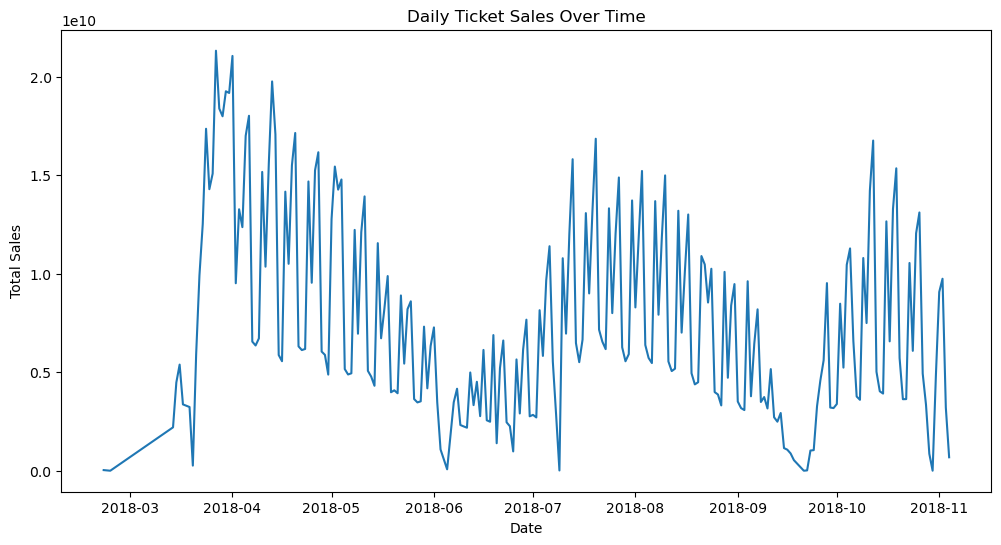

In [71]:
import  matplotlib.pyplot as plt  
plt.figure(figsize=(12, 6))
plt.plot(sales_data['date'], sales_data['total_sales'])
plt.title('Daily Ticket Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

In [72]:
pip install prophet


Note: you may need to restart the kernel to use updated packages.


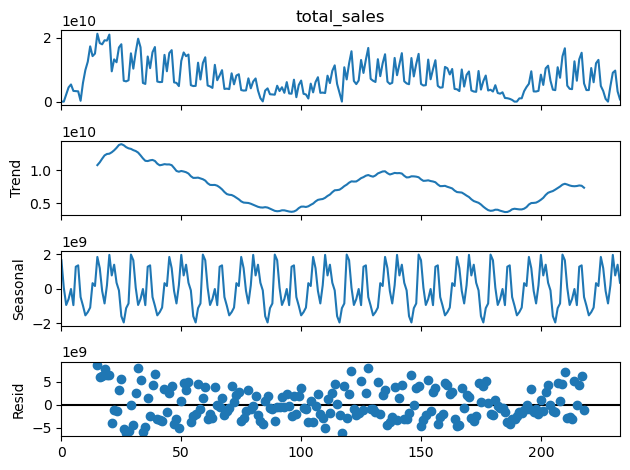

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
decomposition = seasonal_decompose(sales_data['total_sales'], model='additive', period=30)
decomposition.plot()
plt.show()

In [74]:
# ARIMA model for forecasting
arima_model = ARIMA(sales_data['total_sales'], order=(5, 1, 0))
arima_fit = arima_model.fit()
print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            total_sales   No. Observations:                  234
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5471.771
Date:                Fri, 31 May 2024   AIC                          10955.542
Time:                        11:19:59   BIC                          10976.248
Sample:                             0   HQIC                         10963.891
                                - 234                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4876      0.067     -7.267      0.000      -0.619      -0.356
ar.L2         -0.4265      0.065     -6.537      0.000      -0.554      -0.299
ar.L3         -0.3864      0.056     -6.920      0.0

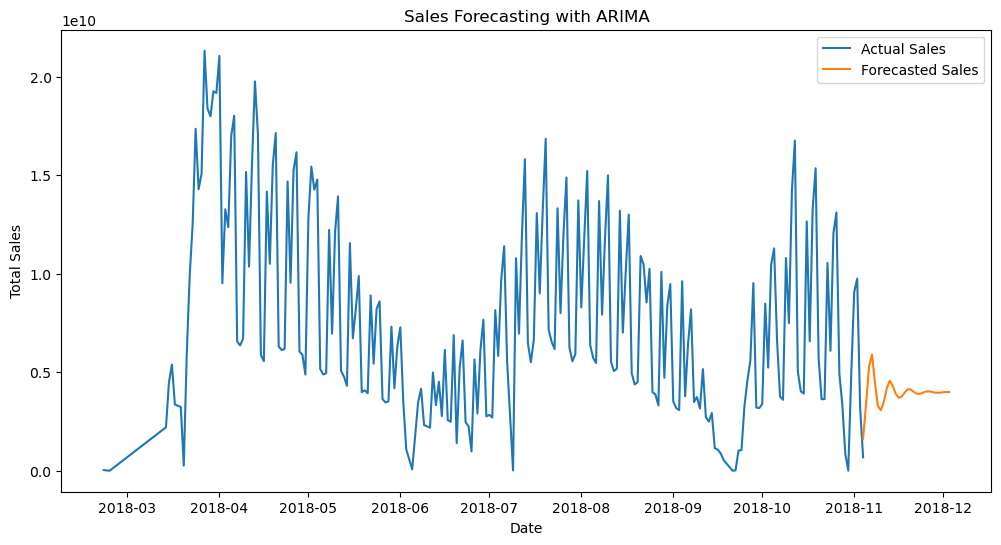

In [75]:
# Forecasting with ARIMA
forecast = arima_fit.forecast(steps=30)
plt.figure(figsize=(12, 6))
plt.plot(sales_data['date'], sales_data['total_sales'], label='Actual Sales')
plt.plot(pd.date_range(start=sales_data['date'].iloc[-1], periods=30, freq='D'), forecast, label='Forecasted Sales')
plt.title('Sales Forecasting with ARIMA')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

11:20:00 - cmdstanpy - INFO - Chain [1] start processing
11:20:00 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Admin\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Admin\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


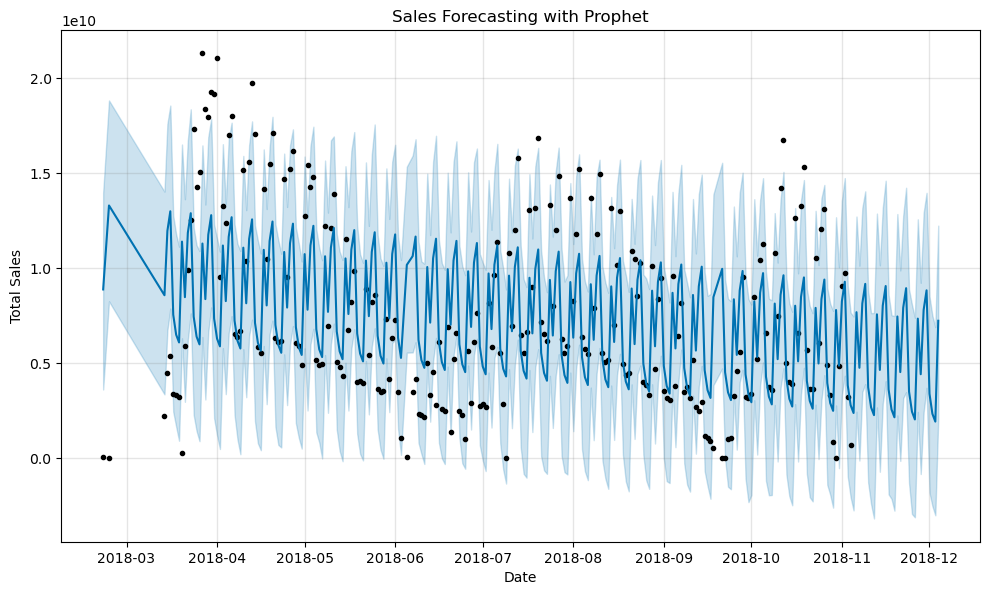

In [76]:
# Prophet model for forecasting
prophet_data = sales_data.rename(columns={'date': 'ds', 'total_sales': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_data)
future = prophet_model.make_future_dataframe(periods=30)
forecast = prophet_model.predict(future)
prophet_model.plot(forecast)
plt.title('Sales Forecasting with Prophet')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

In [83]:
# Cinema Clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Aggregate data by cinema
cinema_data = cinemaData.groupby(['cinema_code']).agg({
    'total_sales': 'sum',
    'capacity': 'sum',
    'tickets_sold': 'sum',
    'tickets_out': 'sum'
}).reset_index()

# Prepare data for clustering
features = cinema_data[['total_sales', 'capacity', 'tickets_sold', 'tickets_out']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


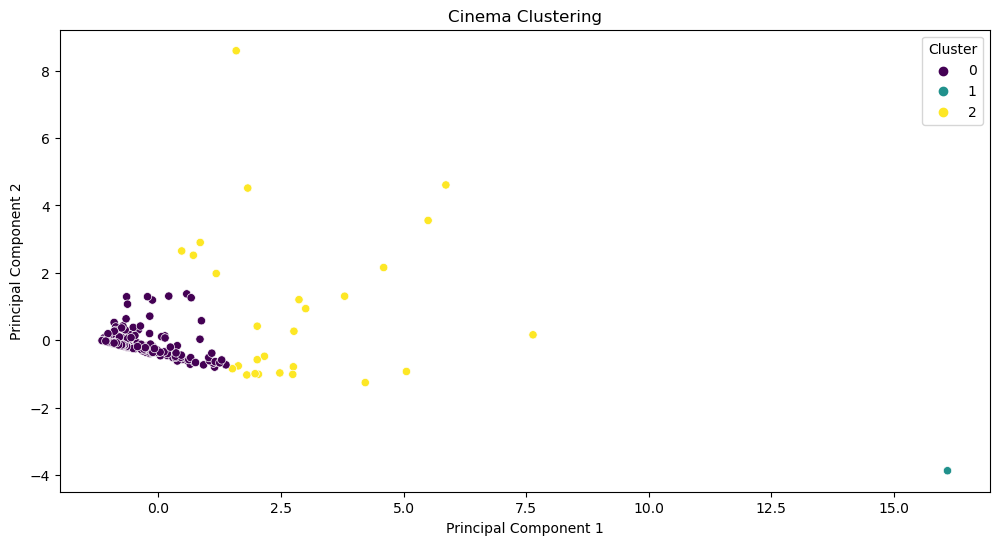

In [78]:
import seaborn as sns
# Prepare data for clustering
features = cinema_data[['total_sales', 'capacity', 'tickets_sold', 'tickets_out']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cinema_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
cinema_data['PC1'] = principal_components[:, 0]
cinema_data['PC2'] = principal_components[:, 1]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=cinema_data, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('Cinema Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [87]:
from sklearn.neighbors import NearestNeighbors

pivot_table = cinemaData.pivot_table(index='cinema_code', columns='capacity', values='total_sales', aggfunc='sum', fill_value=0)

# Fit Nearest Neighbors model
nn_model = NearestNeighbors(metric='cosine', algorithm='brute')
nn_model.fit(pivot_table)



NearestNeighbors(algorithm='brute', metric='cosine')

In [91]:
print(cinema_data.columns)
print(pivot_table.index)


Index(['cinema_code', 'total_sales', 'capacity', 'tickets_sold',
       'tickets_out'],
      dtype='object')
Index([ 32,  33,  34,  35,  39,  43,  48,  50,  51,  52,
       ...
       555, 556, 557, 558, 560, 561, 562, 565, 566, 637],
      dtype='int64', name='cinema_code', length=246)


Cinema Code 482 has similar genre preferences.
Cinema Code 310 has similar genre preferences.
Cinema Code 33 has similar genre preferences.
Cinema Code 430 has similar genre preferences.


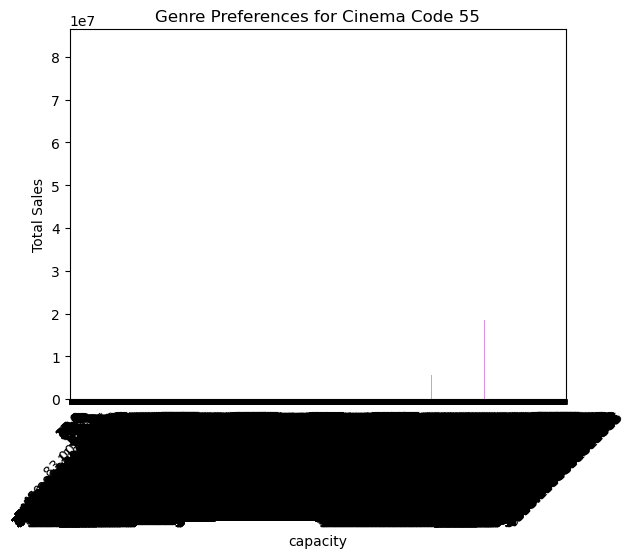

In [113]:
# Check if cinema_id exists in the index of pivot_table
if cinema_id in pivot_table.index:
    distances, indices = nn_model.kneighbors(pivot_table.loc[[cinema_id]], n_neighbors=5)
    
    # Print recommended genres
    for i in range(1, len(indices[0])):
        similar_cinema_id = pivot_table.index[indices[0][i]]
        print(f"Cinema Code {similar_cinema_id} has similar genre preferences.")

    # Visualize genre preferences
    genre_data = pivot_table.loc[[cinema_id]].T
    genre_data.columns = ['Total Sales']
    genre_data = genre_data.reset_index()
    sns.barplot(data=genre_data, x='capacity', y='Total Sales')
    plt.title(f'Genre Preferences for Cinema Code {cinema_id}')
    plt.xlabel('capacity')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.show()
else:
    print(f"Cinema Code {cinema_id} does not exist in the index of pivot_table.")


In [114]:
cinemaData.columns


Index(['film_code', 'cinema_code', 'total_sales', 'tickets_sold',
       'tickets_out', 'show_time', 'occu_perc', 'ticket_price', 'ticket_use',
       'capacity', 'date', 'month', 'quarter', 'day', 'weekday'],
      dtype='object')

In [116]:
 # Visualize genre preferences
genre_data = pivot_table.loc[[cinema_id]].T
genre_data.columns = ['Total Sales']
genre_data = genre_data.reset_index()
sns.barplot(data=genre_data, x='show_time', y='Total Sales')
plt.title(f'capacity Preferences for Cinema Code {cinema_id}')
plt.xlabel('show_time')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

ValueError: Could not interpret input 'show_time'